In [1]:
# Usual
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import time
from tqdm import tqdm

# Autoreload
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

In [2]:
import cv2
from PIL import Image

In [3]:
import sys
sys.path.append("C:/git/computer-vision-control/")

In [7]:
from glob import glob

In [8]:
hand_files = glob("C:/git/computer-vision-control/images/hand_detection/hand/*.png")
not_hand_files = glob("C:/git/computer-vision-control/images/hand_detection/not_hand/*.png")

In [9]:
len(hand_files)

367

In [200]:
x = np.array(Image.open(hand_files[0]))[:,:,[2,1,0]]

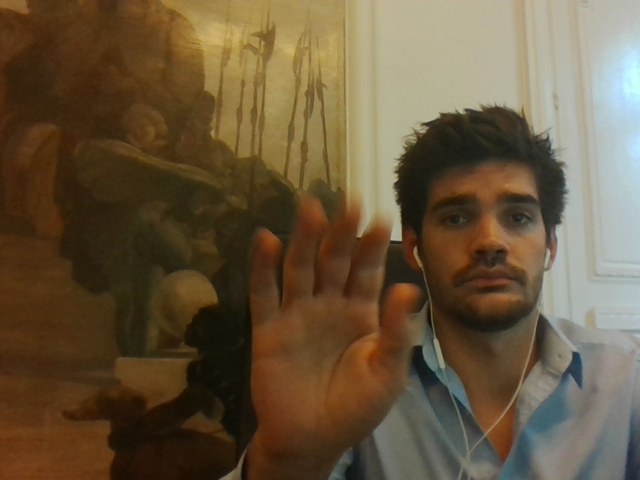

In [201]:
Image.fromarray(x)

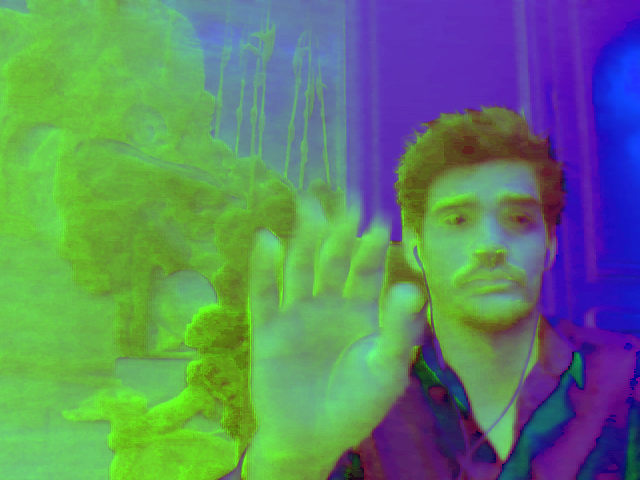

In [50]:
x2 = cv2.cvtColor(x,cv2.COLOR_BGR2HSV)

Image.fromarray(x2)

In [115]:
from ipywidgets import interact

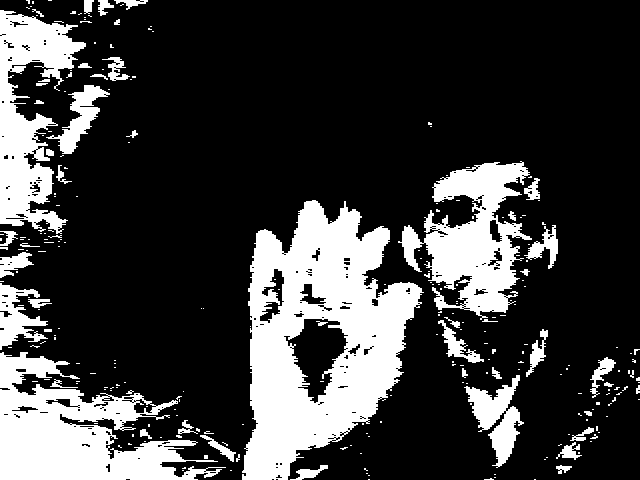

In [119]:
r = [0,255,1]
@interact(mh=r,ms = r,mv = r,mmh = r,mms = r,mmv = r)
def g(mh, ms,mv,mmh,mms,mmv):
    x3 = cv2.inRange(x2,(mh, ms,mv),(mmh,mms,mmv))
    return Image.fromarray(x3)

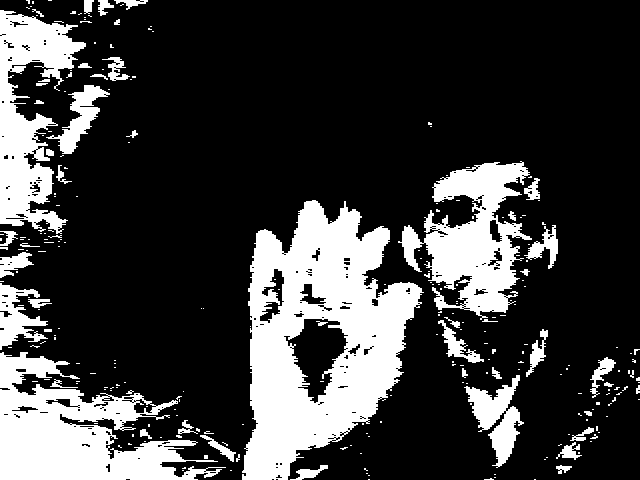

In [238]:
x3 = cv2.inRange(x2,(106, 0,0),(255,255,255))

Image.fromarray(x3)

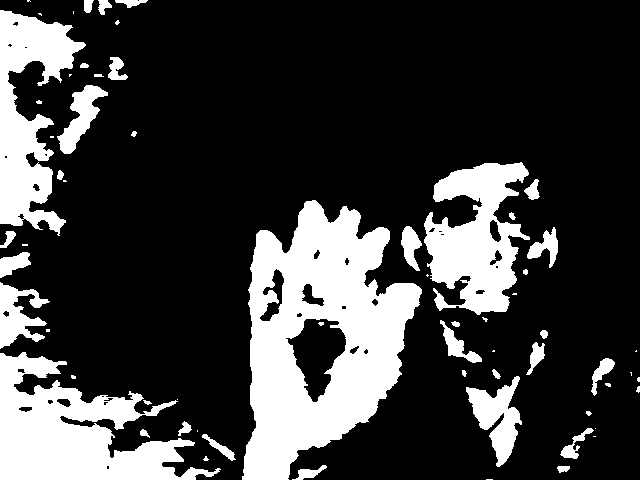

In [239]:
x4 = cv2.medianBlur(x3,5)

Image.fromarray(x4)

In [242]:
element_size = 10
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * element_size + 1, 2 * element_size + 1), (element_size, element_size))

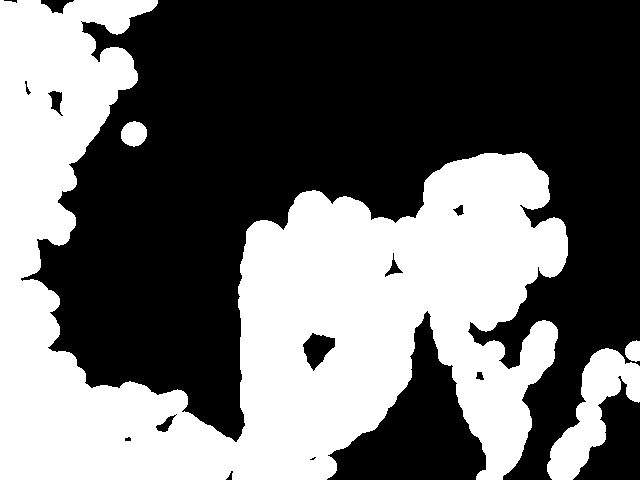

In [243]:
x5 = cv2.dilate(x4,element)

Image.fromarray(x5)

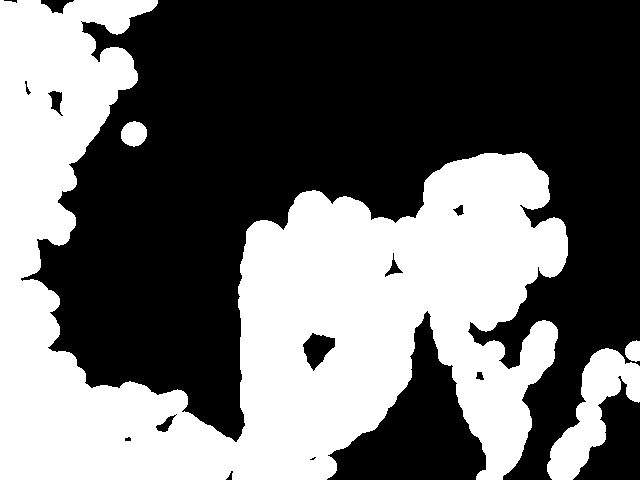

In [244]:
x6, contours, hierarchy = cv2.findContours(x5,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
Image.fromarray(x6)

In [245]:
np.argmax([x.shape[0] for x in contours])

3

In [246]:
x7 = cv2.drawContours(x.copy(),contours,3,(0,255,0),3)

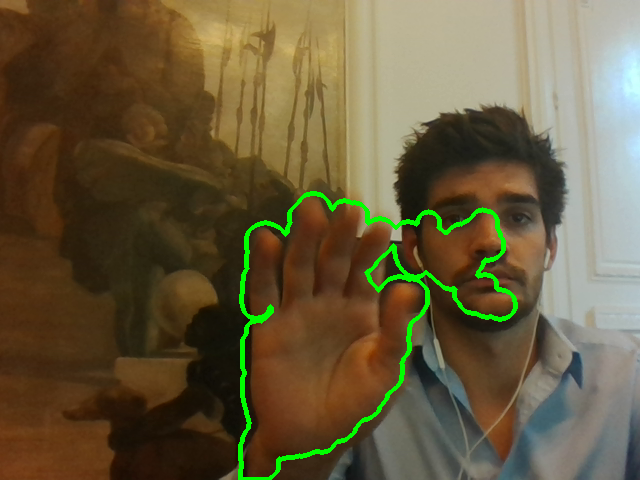

In [253]:
def preprocess_and_show(img,hvs = (107,175,70)):
    x = np.array(Image.open(hand_files[0]))[:,:,[2,1,0]]
    x_original = x.copy()
    x = cv2.cvtColor(x,cv2.COLOR_BGR2HSV)
    x = cv2.inRange(x,(107, 175,70),(255,255,255))
    x = cv2.medianBlur(x,5)
    x = cv2.dilate(x,element)
    x, contours, hierarchy = cv2.findContours(x,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    max_contour = np.argmax([y.shape[0] for y in contours])
    x = cv2.drawContours(x_original,contours,max_contour,(0,255,0),3)
    return Image.fromarray(x_original)
    
preprocess_and_show(Image.open(hand_files[0]))